# Meter-to-Meter Multiplexing Decoding Model

Written July, 2022 by CMH

First we start by modeling the fluctating states of the input neurons. Caruso et al. (2018) found that neurons fluctuate stochastically. Here I simulate the state at each time point as the output of a Bernoulli distribution with a probability of switching of 0.1 (chosen by eye for now to match the data, can play around with what happens as we change that). 

In [43]:
import numpy as np
import matplotlib.pyplot as plt

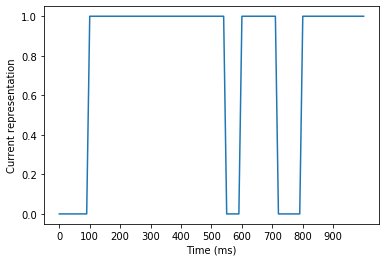

In [51]:
dt = 10 # step size (ms)
t = np.arange(0, 1010, dt) # time points (ms)
p = 0.07 # probability of switching to new state
curr_state = np.empty((len(t),1)) # simulate state changes using Bernoulli distribution
curr_state[:] = np.nan
curr_state[0] = 0
for i in range(1, len(t)):
    cf = np.random.binomial(1, p)
    
    if cf == 1:
        curr_state[i] = np.abs(curr_state[i-1] - 1)
    else:
        curr_state[i] = curr_state[i-1]
        
fig, ax = plt.subplots() # plot
p1 = plt.plot(t, curr_state)
ax.set_ylabel('Current representation')
ax.set_xlabel('Time (ms)')
ax.set_xticks(np.arange(0, 1000, 100))
plt.show()

Next we simulate a monotonic tuning curve. For now we assume that it's linear, but later we can play around with other tuning curve shapes. 

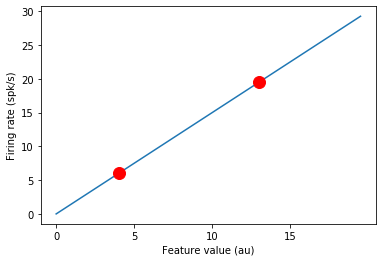

In [49]:
f = np.arange(0, 20, 0.5) # values for feature space
m = 1.5 # slope of the line
b = 0 # intercept of the line
fr = np.multiply(m, f) + b

x1 = 4 # Choose too points differnet from each other to test responses
x2 = 13

fig, ax = plt.subplots() # plot
p1 = plt.plot(f, fr)
plt.plot(x1, fr[x1*2], color='red', marker='o', markersize=12)
plt.plot(x2, fr[x2*2], color='red', marker='o', markersize=12)
ax.set_ylabel('Firing rate (spk/s)')
ax.set_xlabel('Feature value (au)')
ax.set_xticks(np.arange(0, 20, 5))
plt.show()

Now we simulate the response of the neuron

In [ ]:
# neuron A